In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Reading and scalling the data

Testing different datasets - clean with all 79 columns, and final with two different selections of 15 most important features.

In [2]:
data_c = pd.read_parquet('./Local/2017_Clean/Combined.parquet')
data_f1 = pd.read_parquet('./Local/2017_Final/Combined_1.parquet')
data_f2 = pd.read_parquet('./Local/2017_Final/Combined_2.parquet')

data_c = data_c.drop(columns=[' Label'])
data_f1 = data_f1.drop(columns=['Label'])
data_f2 = data_f2.drop(columns=['Label'])

### Reducing the dimensions using PCA

In [3]:
datasets = {'Clean data': data_c, 'Final data 1': data_f1, 'Final data 2': data_f2}

In [4]:
for name, data in datasets.items():
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    
    print(f'--- {name} ---')
    print('Explained variation per principal component (PC): {}'.format(pca.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}\n'.format(np.sum(pca.explained_variance_ratio_)))

--- Clean data ---
Explained variation per principal component (PC): [0.62860641 0.11010856]
Cumulative variance explained by 2 principal components: 73.87%

--- Final data 1 ---
Explained variation per principal component (PC): [0.79193891 0.20800771]
Cumulative variance explained by 2 principal components: 99.99%

--- Final data 2 ---
Explained variation per principal component (PC): [0.79197042 0.20801583]
Cumulative variance explained by 2 principal components: 100.00%



### Feature importance

In [5]:
for name, data in datasets.items():
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    data_pca = pd.DataFrame(abs(pca.components_), columns=data.columns, index=['PC_1', 'PC_2'])

    print(f'--- {name} ---')
    print('Most important features:\n')
    print('PC 1:\n', (data_pca[data_pca > 0.3].iloc[0]).dropna())   
    print('PC 2:\n', (data_pca[data_pca > 0.3].iloc[1]).dropna())
    print('\n')

--- Clean data ---
Most important features:

PC 1:
  Flow Duration    0.435160
 Flow IAT Max     0.313612
Fwd IAT Total     0.434277
 Fwd IAT Max      0.314557
Idle Mean         0.301654
 Idle Max         0.312721
Name: PC_1, dtype: float64
PC 2:
  Flow Duration    0.309949
Fwd IAT Total     0.306129
Bwd IAT Total     0.624901
Name: PC_2, dtype: float64


--- Final data 1 ---
Most important features:

PC 1:
 Total Length of Bwd Packets    0.707105
Subflow Bwd Bytes              0.707095
Name: PC_1, dtype: float64
PC 2:
 Packet Length Variance    0.99999
Name: PC_2, dtype: float64


--- Final data 2 ---
Most important features:

PC 1:
 Total Length of Bwd Packets    0.707105
Subflow Bwd Bytes              0.707095
Name: PC_1, dtype: float64
PC 2:
 Packet Length Variance    0.999991
Name: PC_2, dtype: float64




### Hyperparameter tuning using the silhouette method

In [ ]:
# To do

In [ ]:
plt.bar(range(len(silhouette_scores)), silhouette_scores, align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), parameters)
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

### Lazy approach

In [21]:
def sklearn_k_means(data, k, max_iters=100, tolerance=1e-4):
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, tol=tolerance, random_state=42)
    
    kmeans.fit(data)
    
    centroids = kmeans.cluster_centers_
    closest_centroids = kmeans.labels_
    
    return centroids, closest_centroids

In [22]:
k = 2

#centroids, closest_centroids = k_means(data_c.values, k)
centroids, closest_centroids = sklearn_k_means(data_f1.values, k)
#centroids, closest_centroids = k_means(data_f2.values, k)

/run/media/arzaca/Maxtor/Network-Anomaly-Detection/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


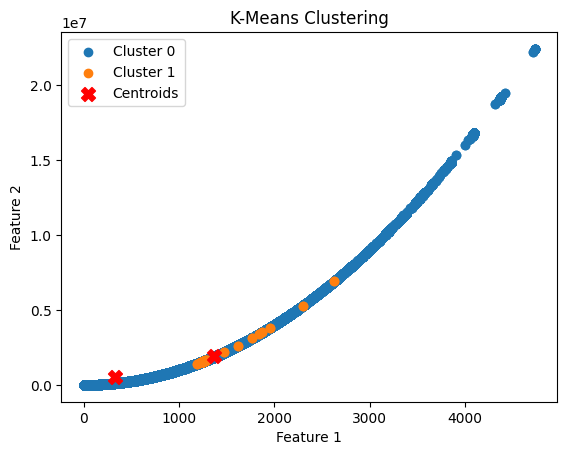

In [23]:
for i in range(k):
    cluster_points = data_f1.values[closest_centroids == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids', marker='X')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Less-lazy approach

In [6]:
def k_means(data, k, max_iters=100, tolerance=1e-4):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_centroids = np.argmin(distances, axis=0)

        new_centroids = np.array([data[closest_centroids==i].mean(axis=0) for i in range(k)])
        
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        
        centroids = new_centroids

    return centroids, closest_centroids

In [24]:
k = 2

#centroids, closest_centroids = k_means(data_c.values, k)
centroids, closest_centroids = k_means(data_f1.values, k)
#centroids, closest_centroids = k_means(data_f2.values, k)

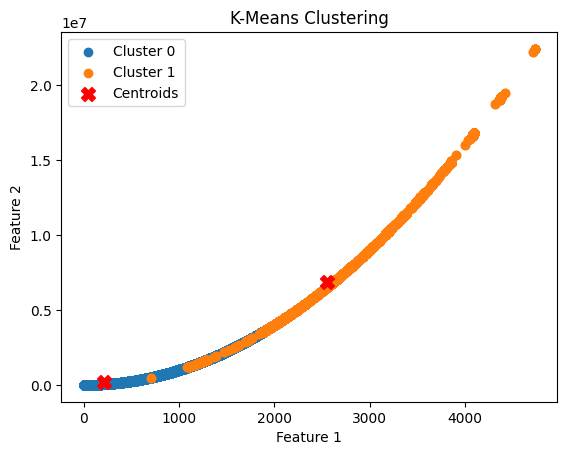

In [25]:
for i in range(k):
    cluster_points = data_f1.values[closest_centroids == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids', marker='X')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()